In [2]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [213]:
x1 = np.load('dataset4.npz')['x1']
x2 = np.load('dataset4.npz')['x2']
y = np.load('dataset4.npz')['y']
error=[]
for i in [[1,4],[1.1,4.1],[1.2,4.1],[1.3,4],[1.4,4],[1.5,4],[1.6,4],[1.1,4.3],[0.9,4],[0.9,4.1],[0.9,3.9],[0.8,3.8],[0.8,3.7],[0.7,3.7],[0,3],[0,0],[1.5,4.09]]:
  X=np.concatenate((x1**2,x2),axis=1)
  error.append(((np.matmul(X,np.transpose(i)).reshape(-1,1)-y)**2).sum()/2)
error

[231.78141856318,
 142.30307732712797,
 83.06699532250884,
 44.89135436750419,
 15.486120792080584,
 2.5266144615577253,
 6.01283537593569,
 124.91203355608415,
 326.9695611182068,
 310.11242307106875,
 345.1869685256143,
 482.51972721443076,
 506.51827940298284,
 643.7796946296296,
 2442.5613108747248,
 4815.245149258564,
 3.821250825194089]

## The minimum error is found around the theta value (1.5,4) so again we make a grid around that to find the optimum value:

In [214]:
error=[]
for i in [[1.5,4],[1.5,4.1],[1.5,4.2],[1.5,4.3],[1.51,4],[1.52,4],[1.53,4],[1.54,4],[1.54,4.1],[1.53,4.1],[1.53,4.2]]:
  X=np.concatenate((x1**2,x2),axis=1)
  error.append(((np.matmul(X,np.transpose(i)).reshape(-1,1)-y)**2).sum()/2)
error

[2.5266144615577253,
 4.0331127780560365,
 6.899880454823732,
 11.126917491860755,
 2.135178826974984,
 1.9082004648412516,
 1.8456793751565275,
 1.9476155579208112,
 4.678356298661545,
 4.270359509836657,
 8.055309004786178]

## So the least error is found at theta value of (1.53,4)

# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [3]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

      X           y
0  10.0  137.301045
1  -4.0   30.271964
2   4.0   41.390876
3   8.0  100.522686
4  -8.0   73.172712
5   6.0   70.655139
6   0.0   12.588404
7  -6.0   40.188202
8  -2.0    7.038657
9   2.0   31.625718


Text(0.5, 1.0, 'Scatter plot')

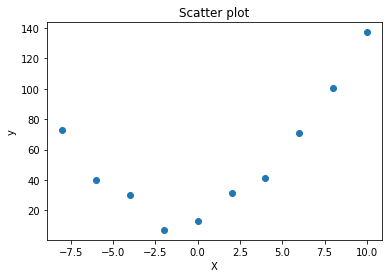

In [4]:
import numpy as np
a=[]
data = np.load('dataset2.npz')
for item in data.files:
  a.append(data[item])
X=a[0]
y=a[1]
data=pd.DataFrame({'X':X,'y':y})
print(data)
plt.scatter(data['X'],data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot')

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

the relation is Y =50.46491531627612+4.0106249536927425 X


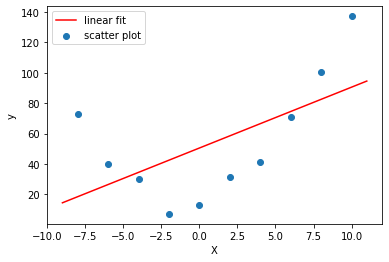

In [5]:
X1=X.reshape(-1,1)
y1=y.reshape(-1,1)
reg=LinearRegression().fit(X1,y1)
coef=reg.coef_
intercept=reg.intercept_
print('the relation is ' + 'Y ='+str(intercept[0])+ '+' + str(coef[0][0])+' X')
x=np.linspace(-9,11)
y=intercept[0]+coef[0][0]*x
plt.plot(x,y,'r')
plt.scatter(data['X'],data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['linear fit','scatter plot'])

In [6]:
mse=mean_squared_error(y1,reg.predict(X1))
print('the mean squared error for linear fit is ',mse )

the mean squared error for linear fit is  977.1734445909718


### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

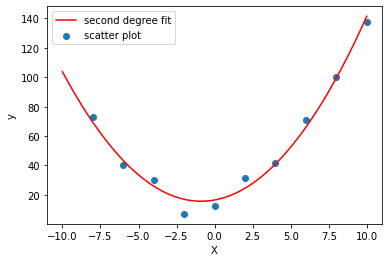

In [7]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X1)
reg.fit(x_poly, y1)
y_poly_pred = reg.predict(x_poly)
coef=reg.coef_
intercept=reg.intercept_
x=np.linspace(-10,10)
y=coef[0][2]*x**2+coef[0][1]*x+intercept[0]
plt.plot(x,y,'r')
plt.scatter(X1,y1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['second degree fit','scatter plot'])

In [8]:
mse=mean_squared_error(y1,y_poly_pred)
print('the mean squared error for second degree fit is ',mse )

the mean squared error for second degree fit is  24.846331727808156


### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

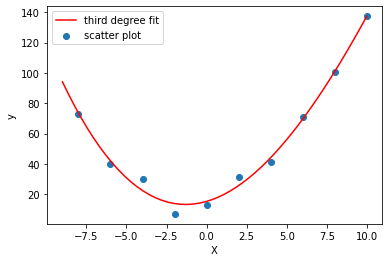

In [9]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X1)
reg.fit(x_poly, y1)
y_poly_pred = reg.predict(x_poly)
coef=reg.coef_
intercept=reg.intercept_
x=np.linspace(-9,10)
y=coef[0][3]*x**3+coef[0][2]*x**2+coef[0][1]*x+intercept[0]
plt.plot(x,y,'r')
plt.scatter(X1,y1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['third degree fit','scatter plot'])

In [10]:
mse=mean_squared_error(y1,y_poly_pred)
print('the mean squared error for third degree fit is ',mse )

the mean squared error for third degree fit is  16.26492228044507


### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

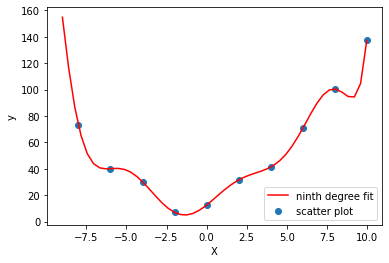

In [11]:
polynomial_features= PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(X1)
reg.fit(x_poly, y1)
y_poly_pred = reg.predict(x_poly)
coef=reg.coef_
intercept=reg.intercept_
x=np.linspace(-9,10)
y=intercept
for i in range(1,10):
  y=y+coef[0][i]*x**(i)
plt.plot(x,y,'r')
plt.scatter(X1,y1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['ninth degree fit','scatter plot'])

In [12]:
mse=mean_squared_error(y1,y_poly_pred)
print('the mean squared error for ninth degree fit is ',mse )

the mean squared error for ninth degree fit is  8.007064354002041e-14


### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

### Best model for training is the polynomial fit of degree 2. Because after 2 there is no much drastic decrease in MSE. 

Text(0, 0.5, 'Mean Squared Error')

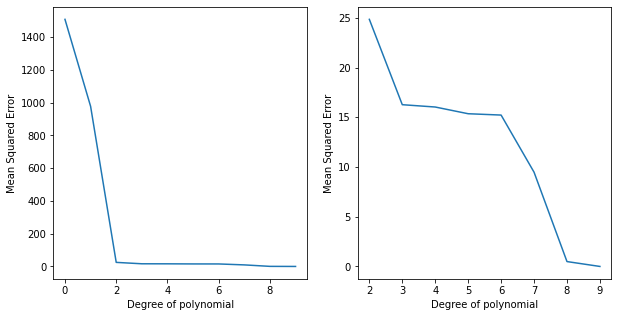

In [13]:
mse=[]
for i in range(10):
  polynomial_features= PolynomialFeatures(degree=i)
  x_poly = polynomial_features.fit_transform(X1)
  reg.fit(x_poly, y1)
  y_poly_pred = reg.predict(x_poly)
  mse.append(mean_squared_error(y1,y_poly_pred))
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(range(10),mse)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')
plt.subplot(122)
plt.plot(range(2,10),mse[2:])
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

Text(0.5, 0, 'Degree of polynomial')

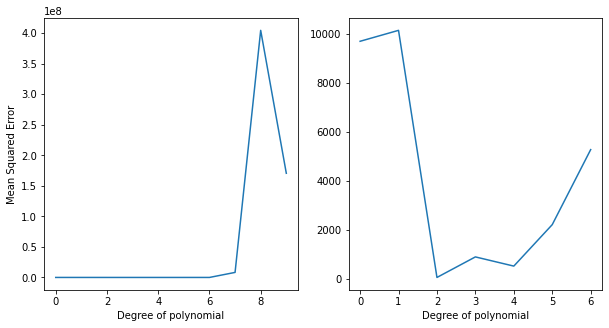

In [15]:
a=[]
mse_test=[]
data = np.load('dataset2_test.npz')
for item in data.files:
  a.append(data[item])
X_test=a[0].reshape(-1,1)
y_test=a[1].reshape(-1,1)
for i in range(10):
  polynomial_features= PolynomialFeatures(degree=i)
  x_poly = polynomial_features.fit_transform(X1)
  x_test=polynomial_features.fit_transform(X_test)
  reg.fit(x_poly, y1)
  y_poly_pred = reg.predict(x_test)
  mse_test.append(mean_squared_error(y_test,y_poly_pred))

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(range(10),mse_test)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')
plt.subplot(122)
plt.plot(range(0,7),mse_test[0:7])
plt.xlabel('Degree of polynomial')


## MSE vs Degree of Polynomial

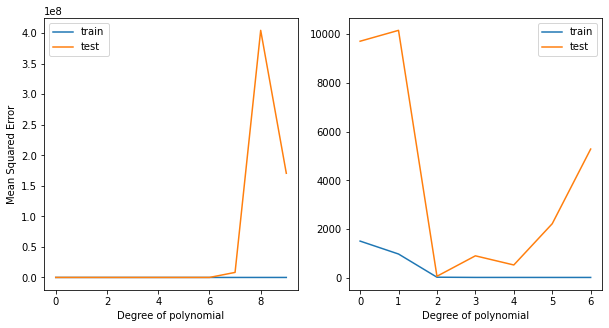

In [16]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(range(10),mse)
plt.plot(range(10),mse_test)

plt.legend(['train','test'])
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')
plt.subplot(122)
plt.plot(range(0,7),mse[0:7])
plt.plot(range(0,7),mse_test[0:7])
plt.xlabel('Degree of polynomial')
plt.legend(['train','test'])

### 7.8. Best Degree of polynomial

#### 8) Best degree of polynomial will be 2. Because it is where the test data MSE is minimum. Also the MSE for training data is not changing drastically after degree 2.

# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [49]:
data=pd.read_csv('dataset3.csv')
non=data.drop(['RAD','CHAS','ZN'],axis=1)
median=[np.median(non[i]) for i in non.columns]
first_quantile=[np.quantile(non[i],.25) for i in non.columns]
second_quantile=[np.quantile(non[i],.50) for i in non.columns]
third_quantile=[np.quantile(non[i],.75) for i in non.columns]
max=np.max(non)
min=np.min(non)
range=max-min
stat=pd.DataFrame({'mean':np.mean(non),'median':[np.median(non[i]) for i in non.columns],'25':first_quantile,'50':second_quantile,'75':third_quantile,'max':max,'min':min,'range':range})
stat

,mean,median,25,50,75,max,min,range
CRIM,3.613524,0.25651,0.082045,0.25651,3.677083,88.9762,0.00632,88.96988
INDUS,11.136779,9.69000,5.190000,9.69000,18.100000,27.7400,0.46000,27.28000
NOX,0.554695,0.53800,0.449000,0.53800,0.624000,0.8710,0.38500,0.48600
RM,6.284634,6.20850,5.885500,6.20850,6.623500,8.7800,3.56100,5.21900
AGE,68.574901,77.50000,45.025000,77.50000,94.075000,100.0000,2.90000,97.10000
DIS,3.795043,3.20745,2.100175,3.20745,5.188425,12.1265,1.12960,10.99690
TAX,408.237154,330.00000,279.000000,330.00000,666.000000,711.0000,187.00000,524.00000
PTRATIO,18.455534,19.05000,17.400000,19.05000,20.200000,22.0000,12.60000,9.40000
B,356.674032,391.44000,375.377500,391.44000,396.225000,396.9000,0.32000,396.58000
LSTAT,12.653063,11.36000,6.950000,11.36000,16.955000,37.9700,1.73000,36.24000


### Mode for categorical 

In [50]:
import scipy
cat=data[['RAD', 'CHAS', 'ZN']]
pd.DataFrame({'Columm':cat.columns,'mode':[scipy.stats.mode(cat[i])[0][0] for i in cat.columns]})

,Columm,mode
0,RAD,24.0
1,CHAS,0.0
2,ZN,0.0


## Histograms/Distributions

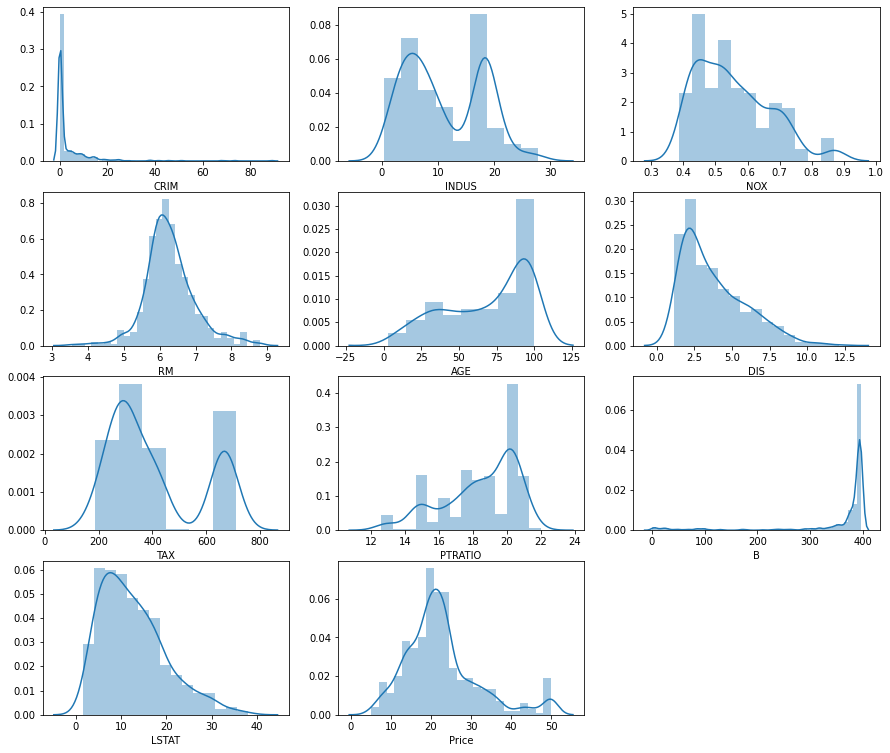

In [51]:
import seaborn as sns
j=1
plt.figure(figsize=[15,30])
for i in non.columns:
  plt.subplot(9,3,j)
  sns.distplot(non[i])
  j=j+1

## 8.2. Correlation Heatmap for all the features and target

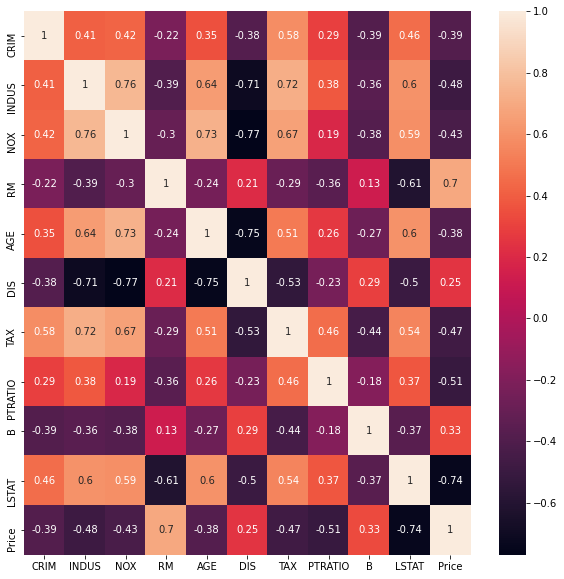

In [52]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(non.corr(),annot=True)

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

In [53]:
corr=non.corr()
value=abs(corr['Price'])
sorted=value.sort_values(ascending=False)
sorted[1:6]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: Price, dtype: float64

## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Price'],axis=1),data['Price'], test_size=0.33, random_state=2020)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [55]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred_train=reg.predict(X_train)
mse=mean_squared_error(y_train,y_pred_train)
print('Train MSE is ', mse)

Train MSE is  22.166423224150186


## 8.6. Predict Outputs for Test Data
Report test MSE

In [56]:
y_pred_test=reg.predict(X_test)
mse_test=mean_squared_error(y_test,y_pred_test)
print('Test MSE is ', mse_test)

Test MSE is  22.004861555354598


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [57]:
importance=reg.coef_
feature=pd.DataFrame({'features':X_train.columns,'importance':abs(importance)})
feature.sort_values('importance',ascending=False)

,features,importance
4,NOX,15.350205
5,RM,4.326127
3,CHAS,3.472599
7,DIS,1.457247
10,PTRATIO,0.897340
12,LSTAT,0.503393
8,RAD,0.297183
0,CRIM,0.118161
1,ZN,0.044580
2,INDUS,0.015565


# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

## Answers

#### 1) Rank is equal to the number of columns so the columns are linearly independent. Hence, first assumption is correct.

In [35]:
dat=data.drop(['Price'],axis=1).to_numpy()
np.linalg.matrix_rank(dat)

13

#### Each subplot is a scatter plot between the feature and Output value(Price). So we can see that only a few features are linear. This assumption is wrong.

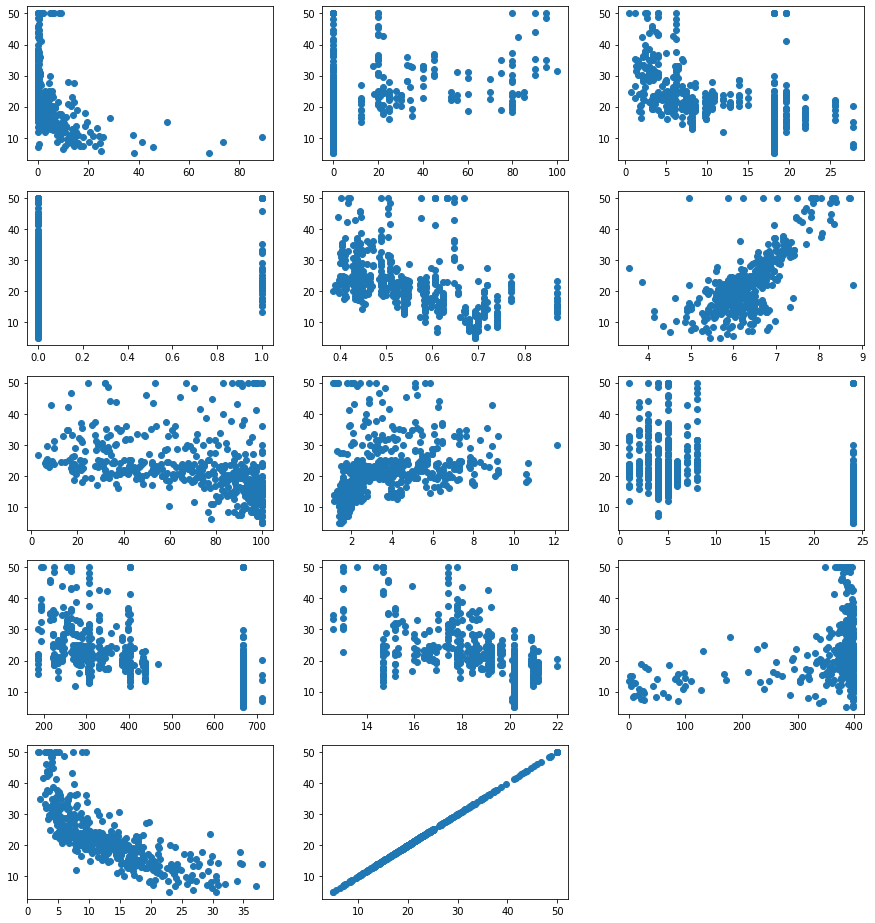

In [41]:
import seaborn as sns
j=1
plt.figure(figsize=[15,30])
for i in data.columns:
  plt.subplot(9,3,j)
  plt.scatter(data[i],data['Price'])
  j=j+1

#### Multicollinearity could be checked from the heatmap. Every feature is related to the other feature with some lineality. So this assumption that the variables should have no multicollinearity is not satisfied in this dataset

#### 2) No, the highly important features and highly correlated features with price are not the same. 

#### 3) True error is always usually higher than training error, this is because the model is fitted for the training set and the error is less while trying to fit the same training data. But, when new test data is tested the error is somewhat high. 

#### 4) Yes, we can use the analytical approach to solve the problem. Because the data has only 14 features which is small and the computation of inverse is also quick. 

In [64]:
X_train=X_train.to_numpy()
X_appended=X_train
np.matmul(np.linalg.inv(np.matmul(np.transpose(X_appended),X_appended)),(np.matmul(np.transpose(X_appended),y_train)))

array([-9.22054688e-02,  4.65285399e-02, -6.09306507e-04,  3.57085697e+00,
       -2.87437369e+00,  6.13128326e+00, -1.08648153e-02, -1.01670104e+00,
        1.84980321e-01, -8.84280914e-03, -4.30142266e-01,  1.41678679e-02,
       -4.19550297e-01])